<a href="https://colab.research.google.com/github/andresalesbarbosa/Puzzles/blob/master/PhillyCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Regression

Author: _André Barbosa_

Last Update_ _February 2019_

This notebook are modified from ml-regression course from University of Washington in Coursera. 

They were modified to use pandas and scikit-learn

In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [0]:
sales = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Philadelphia_Crime_Rate_noNA.csv')

In [7]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


#Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


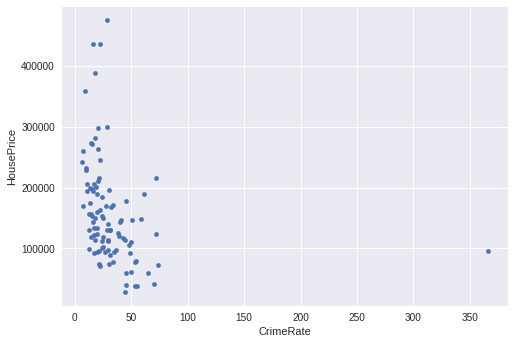

In [11]:
sales.plot('CrimeRate','HousePrice',kind='scatter')

#Fit the regression model using crime as the feature

In [0]:
linearReg = linear_model.LinearRegression()
X = sales['CrimeRate'].values.reshape(-1,1)
# add intercept
X = np.hstack([np.ones(X.shape),X])
y = sales['HousePrice'].values
crime_model = linearReg.fit(X,y)

In [37]:

print('X_0:',crime_model.intercept_)
print('X_1:',crime_model.coef_[1])


X_0: 176629.40810695424
X_1: -576.908127682389


#Let's see what our fit looks like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

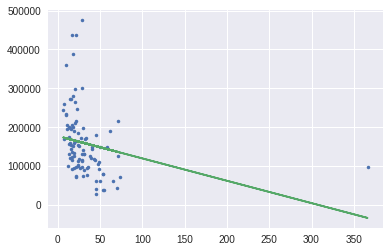

In [30]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(X),'-')

Above: blue dots are original data, green line is the fit from the simple regression.

# Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

In [0]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

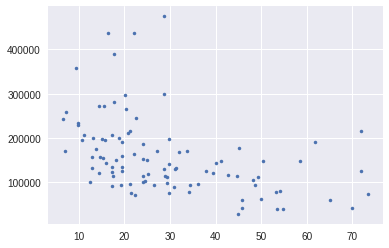

In [40]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.')

### Refit our simple regression model on this modified dataset:

In [0]:
X = sales_noCC['CrimeRate'].values.reshape(-1,1)
# add intercept
X = np.hstack([np.ones(X.shape),X])
y = sales_noCC['HousePrice'].values
crime_model_noCC = linearReg.fit(X,y)

### Look at the fit:

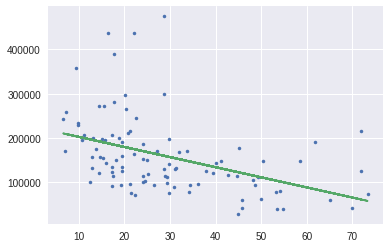

In [43]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(X),'-')

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [47]:
print('X_0',crime_model.intercept_)
print('X_1',crime_model.coef_[1])

X_0 176629.40810695424
X_1 -576.908127682389


In [48]:
print('X_0',crime_model_noCC.intercept_)
print('X_1',crime_model_noCC.coef_[1])

X_0 225233.5518390038
X_1 -2288.6894299483647


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different!

###High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

###Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

# Remove high-value outlier neighborhoods and redo analysis

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.  Let's remove them and see what happens.

In [0]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

### Do the coefficients change much?

In [0]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


In [0]:
crime_model_nohighend.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


Above: We see that removing the outlying high-value neighborhoods has *some* effect on the fit, but not nearly as much as our high-leverage Center City datapoint.